In [4]:
pip install --upgrade google-cloud-storage

In [7]:
pip install --upgrade google-cloud-speech

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade google-cloud-language

  Obtaining dependency information for google-cloud-language from https://files.pythonhosted.org/packages/19/4c/8a42006ec29f26d1d0f47f5fdebe7138a700eda8e3668d53ffcb55c9a774/google_cloud_language-2.11.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/138.7 kB ? eta -:--:--
   ---------------------------------------- 138.7/138.7 kB 4.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install --upgrade google-cloud-firestore

  Obtaining dependency information for google-cloud-firestore from https://files.pythonhosted.org/packages/91/bf/8f1fc3f8d97fab159e78072fe8a5e047c61ff98e256f5a31faa5c5c5960d/google_cloud_firestore-2.13.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/289.4 kB ? eta -:--:--
   ---------------------------------------- 289.4/289.4 kB 9.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
import os
from google.cloud import storage

In [9]:
from google.cloud import speech_v1p1beta1 as speech

In [10]:
from google.cloud import language_v1

In [11]:
from google.cloud import language_v1
from google.cloud.language_v1 import types

In [12]:
type_ = types.Document.Type.PLAIN_TEXT

In [15]:
from google.cloud import firestore

In [16]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/aravi/expanded-goal-402620-dc3042ba32d5.json"

In [17]:
def create_bucket(bucket_name):
    storage_client = storage.Client()
    
    # If this throws an error, then the bucket does not exist.
    try:
        storage_client.get_bucket(bucket_name)
        print(f"Bucket {bucket_name} already exists.")
    except:
        bucket = storage_client.create_bucket(bucket_name)
        print(f"Bucket {bucket_name} created.")

bucket_name = "aravind_chandran777"
create_bucket(bucket_name)

Bucket aravind_chandran777 created.


In [18]:
pip install pydub

Note: you may need to restart the kernel to use updated packages.


In [21]:
def upload_to_bucket(bucket_name, source_file_name, destination_blob_name):
    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)

    blob.upload_from_filename(source_file_name)
    return blob.public_url
# Use the function
bucket_name = "aravind_chandran777"
audio_path = "C:/Users/aravi/Downloads/audio note.wav"
upload_to_bucket(bucket_name, audio_path, "audio note")

'https://storage.googleapis.com/aravind_chandran777/audio%20note'

In [41]:
import google.cloud.speech_v1 as speech
from google.cloud.speech_v1 import types
import time
 
def transcribe_audio(gcs_uri):
    try:
        client = speech.SpeechClient()
        audio = speech.RecognitionAudio(uri=gcs_uri)
        config = speech.RecognitionConfig(
            encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
            language_code="en-US",
        )
 
        operation = client.long_running_recognize(config=config, audio=audio)
        print('Waiting for operation to complete...')
        response = operation.result(timeout=90)  # Wait for 90 seconds for the operation to complete
 
        # Example of how to format the results
        for result in response.results:
            print("Transcript: {}".format(result.alternatives[0].transcript))
 
        return response
    except Exception as e:
        print("An error occurred: {}".format(e))
        return None
gcs_uri = "gs://aravind_chandran777/audio note"
response = transcribe_audio(gcs_uri)

Waiting for operation to complete...
Transcript: the Birch canoes slid on the smooth planks
Transcript:  glue the sheet to the dark blue background
Transcript:  it is easy to tell the death of a well
Transcript:  these days a chicken leg is a verb dish
Transcript:  rice is often served in round bowls
Transcript:  the juice of lemons makes find punch
Transcript:  the box was down beside the park truck
Transcript:  the Hogs of food shop corn and garbage
Transcript:  4 hours of study work Facebook
Transcript:  a large size in stockings is hard to sell


In [25]:
from google.cloud import language_v1

def analyze_sentiment(text_content):
    client = language_v1.LanguageServiceClient()
    type_ = 1  # Using 1 for PLAIN_TEXT
    document = {"content": text_content, "type_": type_, "language": "en"}

    response = client.analyze_sentiment(request={'document': document})
    return response.document_sentiment

# Assuming you've fetched the 'response' object somewhere above this code
# Use the function for each transcribed sentence
for result in response.results:
    sentence_text = result.alternatives[0].transcript
    sentiment = analyze_sentiment(sentence_text)
    print(sentence_text, sentiment.score, sentiment.magnitude)

the Birch canoes slid on the smooth planks 0.10000000149011612 0.10000000149011612
 glue the sheet to the dark blue background 0.0 0.0
 it is easy to tell the death of a well 0.5 0.5
 these days a chicken leg is a verb dish -0.4000000059604645 0.4000000059604645
 rice is often served in round bowls -0.4000000059604645 0.4000000059604645
 the juice of lemons makes find punch -0.10000000149011612 0.10000000149011612
 the box was down beside the park truck -0.6000000238418579 0.6000000238418579
 the Hogs of food shop corn and garbage -0.800000011920929 0.800000011920929
 4 hours of study work Facebook 0.10000000149011612 0.10000000149011612
 a large size in stockings is hard to sell -0.699999988079071 0.699999988079071


In [28]:
def store_in_firestore(data):
    db = firestore.Client()
    doc_ref = db.collection('transcriptions').document()  # Create a new document
    doc_ref.set(data)

# Use the function
for idx, result in enumerate(response.results):
    sentence_text = result.alternatives[0].transcript
    sentiment = analyze_sentiment(sentence_text)
    data = {
        'wav_filename': 'audio note',
        'sentence_number': idx + 1,
        'sentence_text': sentence_text,
        'sentiment': sentiment.score,
        'magnitude': sentiment.magnitude,
        'transcription_date': firestore.SERVER_TIMESTAMP
    }
    store_in_firestore(data)

In [29]:
import matplotlib.pyplot as plt

In [30]:
sentences = sentence_text
sentiment_scores = sentiment.score
magnitudes = sentiment.magnitude

In [31]:
def get_data_from_firestore():
    db = firestore.Client()
    transcriptions = db.collection('transcriptions').stream()
    data = []
    for transcription in transcriptions:
        data.append(transcription.to_dict())
    return data

all_data = get_data_from_firestore()

In [32]:
sentences = [item['sentence_text'] for item in all_data]
sentiment_scores = [item['sentiment'] for item in all_data]
magnitudes = [item['magnitude'] for item in all_data]


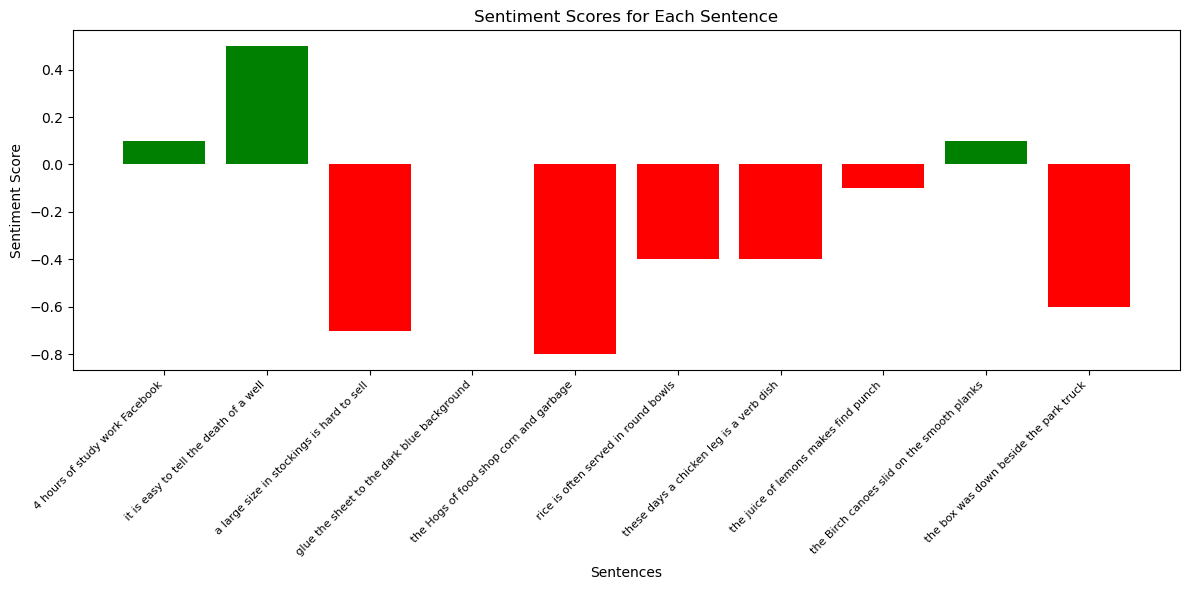

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(sentences, sentiment_scores, color=['green' if score > 0 else 'red' for score in sentiment_scores])
plt.xlabel('Sentences')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores for Each Sentence')
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.tight_layout()
plt.show()

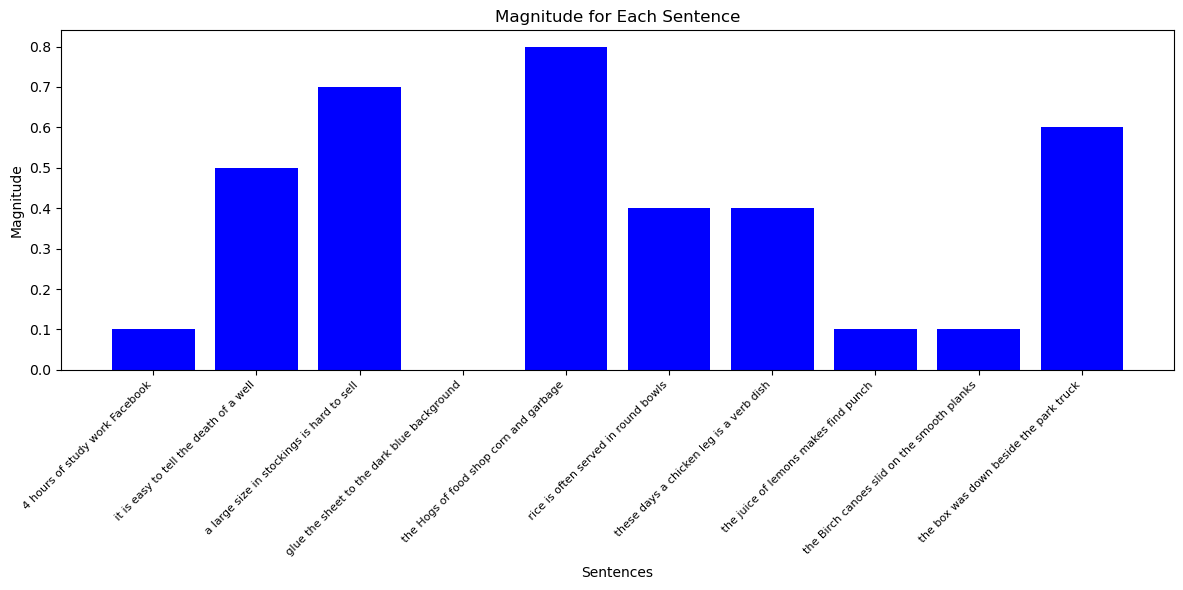

In [34]:
plt.figure(figsize=(12, 6))
plt.bar(sentences, magnitudes, color='blue')
plt.xlabel('Sentences')
plt.ylabel('Magnitude')
plt.title('Magnitude for Each Sentence')
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.tight_layout()
plt.show()

In [39]:
num_sentences = len(sentiment_scores)
num_sentences

10

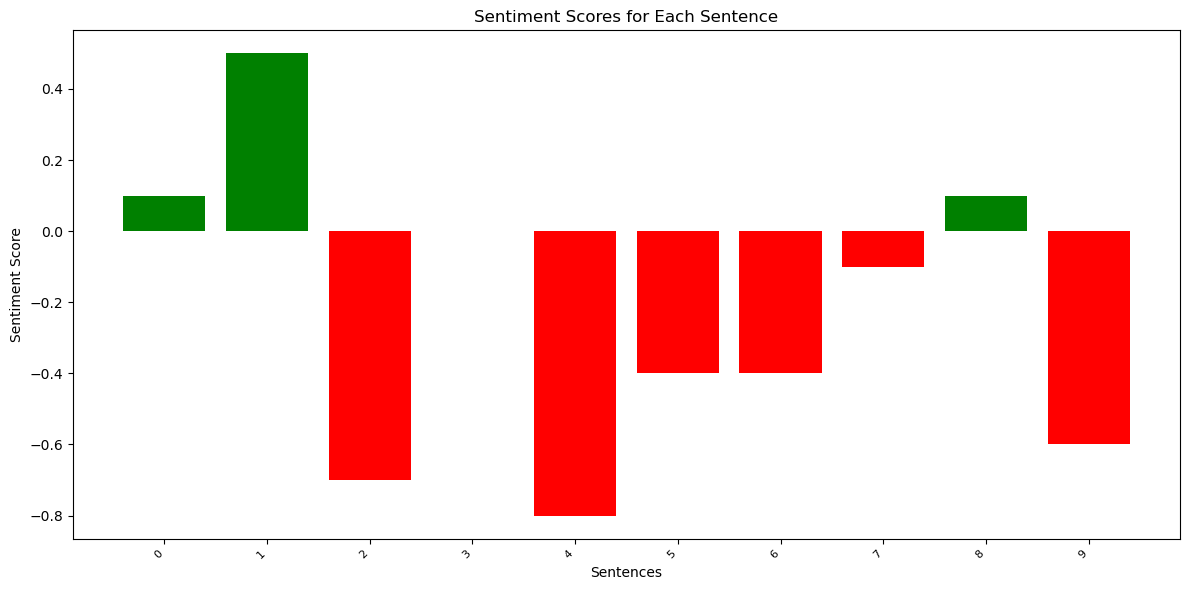

In [35]:
import matplotlib.pyplot as plt
 
# Number of sentences
num_sentences = len(sentiment_scores)
 
# Creating a figure and axis
plt.figure(figsize=(12, 6))
plt.bar(range(num_sentences), sentiment_scores, color=['green' if score > 0 else 'red' for score in sentiment_scores])
 
# Adding labels and title
plt.xlabel('Sentences')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores for Each Sentence')
 
# Adjusting the x-axis ticks
plt.xticks(range(num_sentences), rotation=45, ha="right", fontsize=8)
 
# Adjusting layout for better appearance
plt.tight_layout()
 
# Showing the plot
plt.show()

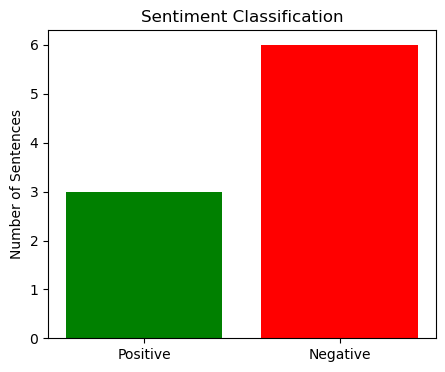

In [36]:
import matplotlib.pyplot as plt
 
 
def categorize_sentiment(scores):
    categories = {'Positive': 0, 'Negative': 0}
    for score in scores:
        if score > 0:
            categories['Positive'] += 1
        elif score < 0:
            categories['Negative'] += 1
    return categories
 
sentiment_categories = categorize_sentiment(sentiment_scores)
 
# Creating a figure and axis
plt.figure(figsize=(5, 4))
plt.bar(sentiment_categories.keys(), sentiment_categories.values(), color=['green', 'red'])
 
# Adding labels and title
plt.ylabel('Number of Sentences')
plt.title('Sentiment Classification')
 
# Showing the plot
plt.show()

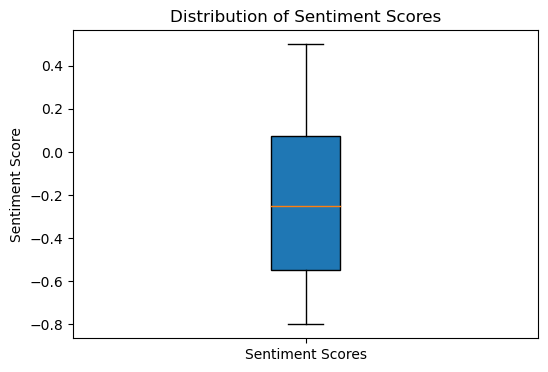

In [37]:
import matplotlib.pyplot as plt
 
 
plt.figure(figsize=(6, 4))
plt.boxplot(sentiment_scores, vert=True, patch_artist=True)
 
plt.title('Distribution of Sentiment Scores')
plt.ylabel('Sentiment Score')
plt.xticks([1], ['Sentiment Scores'])
 
# Showing the plot
plt.show()